In [196]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
close_px_all = pd.read_csv('Desktop/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

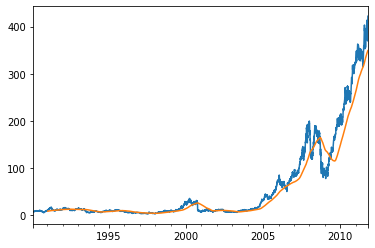

In [3]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [4]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

1990-02-08         NaN
1990-02-09         NaN
1990-02-12         NaN
1990-02-13         NaN
1990-02-14    0.148189
1990-02-15    0.141003
1990-02-16    0.135454
Freq: B, Name: AAPL, dtype: float64

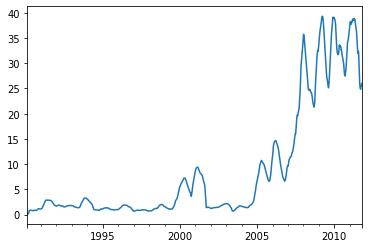

In [5]:
appl_std250.plot()

In [6]:
expanding_mean = appl_std250.expanding().mean()

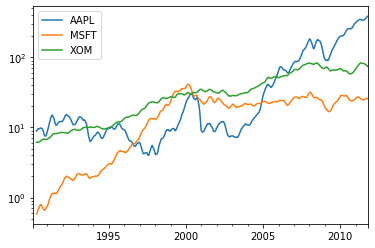

In [7]:
close_px.rolling(60).mean().plot(logy=True)

In [8]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
1990-02-01,7.860000,0.510000,6.120000
1990-02-02,7.930000,0.510000,6.180000
1990-02-05,8.013333,0.510000,6.203333
1990-02-06,8.040000,0.510000,6.210000
1990-02-07,7.986000,0.510000,6.234000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


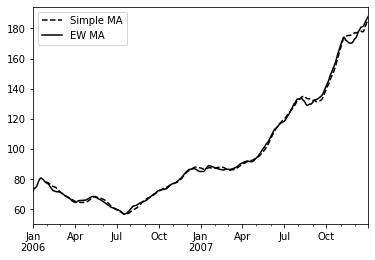

In [12]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

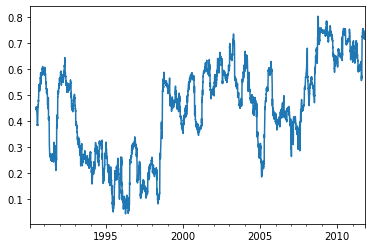

In [13]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

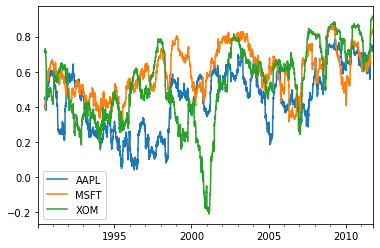

In [14]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


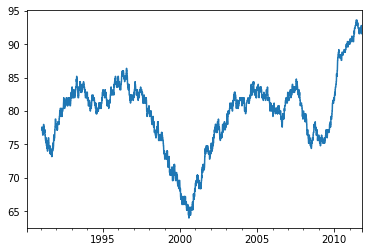

In [15]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [2]:
import numpy as np; import pandas as pd
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [3]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [4]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [5]:
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [6]:
dim

0     apple
1    orange
dtype: object

In [7]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [8]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
columns=['basket_id', 'fruit', 'count', 'weight'])
df

,basket_id,fruit,count,weight
0,0,apple,3,3.925382
1,1,orange,10,2.342555
2,2,apple,9,3.131466
3,3,apple,7,1.996162
4,4,apple,13,0.526672
5,5,orange,12,1.803943
6,6,apple,4,1.226334
7,7,apple,10,2.755391


In [9]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [10]:
c = fruit_cat.values
type(c)

pandas.core.arrays.categorical.Categorical

In [11]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [12]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

In [13]:
df['fruit'] = df['fruit'].astype('category')
df.fruit

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [14]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [15]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

In [16]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)
ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [17]:
my_cats_2.as_ordered()

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

In [18]:
np.random.seed(12345)
draws = np.random.randn(1000)
draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

In [19]:
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.9499999999999997, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

In [20]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [21]:
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [22]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws)
           .groupby(bins)
           .agg(['count', 'min', 'max'])
           .reset_index())
results

,quartile,count,min,max
0,Q1,250,-2.949343,-0.685484
1,Q2,250,-0.683066,-0.010115
2,Q3,250,-0.010032,0.628894
3,Q4,250,0.634238,3.927528


In [23]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [24]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))
#etiketleri kategorilere dönüştürüyoruz:
categories = labels.astype('category')

In [25]:
#etiketlerin kategorilerden çok daha fazla bellek kullandığını not ediyoruz:
labels.memory_usage()

80000128

In [26]:
categories.memory_usage()

10000320

In [27]:
%time _ = labels.astype('category')

Wall time: 890 ms


In [28]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [29]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [30]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [31]:
actual_categories = ['a', 'b', 'c', 'd', 'e']
cat_s2 = cat_s.cat.set_categories(actual_categories)
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): [a, b, c, d, e]

In [32]:
cat_s.value_counts()

d    2
c    2
b    2
a    2
dtype: int64

In [34]:
cat_s2.value_counts()

d    2
c    2
b    2
a    2
e    0
dtype: int64

In [35]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): [a, b, c, d]

In [36]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): [a, b]

In [37]:
cat_s = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

In [38]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


In [39]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [40]:
#anahtar yoluyla grup demektir:
g = df.groupby('key').value
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [41]:
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [42]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [43]:
g.transform(lambda x: x * 2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [44]:
g.transform(lambda x: x.rank(ascending=False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [45]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [46]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [47]:
g.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [48]:
 g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [49]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')
normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [50]:
N = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time': times,
                   'value': np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [51]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [52]:
df2 = pd.DataFrame({'time': times.repeat(3),
                    'key': np.tile(['a', 'b', 'c'], N),
                    'value': np.arange(N * 3.)})
df2[:7]

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [62]:
time_key = df.groupby(pd.TimeGrouper('5min'))
resampled = (df2.set_index('time')
             .groupby(['key', time_key])
             .sum())
resampled
#bu yontem kullanımdan kaldırılmıs!...

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

In [63]:
df2.groupby (['key', pd.Grouper (key = 'time', freq = '5T')]). sum ()

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [65]:
df2.groupby('key').resample('5T', on='time').sum()

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

In [67]:
resampled=df2.groupby('key').resample('5T', on='time').sum()
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


In [84]:
def group_demean(df, by, cols):
    result = df.copy()
    g = df.groupby(by)
    for c in cols:
        result[c] = df[c] - g[c].transform('mean')
    return result

In [2]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [3]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [4]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [5]:
df2 = pd.DataFrame(data.values, columns=['one', 'two', 'three'])
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [6]:
df3 = data.copy()
df3['strings'] = ['a', 'b', 'c', 'd', 'e']
df3

,x0,x1,y,strings
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [7]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [8]:
model_cols = ['x0', 'x1']
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [9]:
data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [10]:
dummies = pd.get_dummies(data.category, prefix='category')
data_with_dummies = data.drop('category', axis=1).join(dummies)
data_with_dummies

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


In [12]:
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [13]:
import patsy
y, X = patsy.dmatrices('y ~ x0 + x1', data)

In [14]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [16]:
X

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [17]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [18]:
np.asarray(X)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [19]:
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [27]:
import numpy as np
coef, resid, _, _ = np.linalg.lstsq(X, y)
#rcond=None iletmemiz isteniyor..

C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [25]:
coef, resid, _, _ = np.linalg.lstsq(X, y, rcond=None)

In [26]:
coef

array([[ 0.31290976],
       [-0.07910564],
       [-0.26546384]])

In [28]:
coef = pd.Series(coef.squeeze(), index=X.design_info.column_names)
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

In [29]:
y, X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  x0  np.log(np.abs(x1) + 1)
          1   1                 0.00995
          1   2                 0.00995
          1   3                 0.22314
          1   4                 1.62924
          1   5                 0.00000
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'np.log(np.abs(x1) + 1)' (column 2)

In [30]:
y, X = patsy.dmatrices('y ~ standardize(x0) + center(x1)', data)
X

DesignMatrix with shape (5, 3)
  Intercept  standardize(x0)  center(x1)
          1         -1.41421        0.78
          1         -0.70711        0.76
          1          0.00000        1.02
          1          0.70711       -3.33
          1          1.41421        0.77
  Terms:
    'Intercept' (column 0)
    'standardize(x0)' (column 1)
    'center(x1)' (column 2)

In [31]:
new_data = pd.DataFrame({
    'x0': [6, 7, 8, 9],
    'x1': [3.1, -0.5, 0, 2.3],
    'y': [1, 2, 3, 4]})
new_X = patsy.build_design_matrices([X.design_info], new_data)
new_X

[DesignMatrix with shape (4, 3)
   Intercept  standardize(x0)  center(x1)
           1          2.12132        3.87
           1          2.82843        0.27
           1          3.53553        0.77
           1          4.24264        3.07
   Terms:
     'Intercept' (column 0)
     'standardize(x0)' (column 1)
     'center(x1)' (column 2)]

In [32]:
y, X = patsy.dmatrices('y ~ I(x0 + x1)', data)
X

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

In [33]:
data = pd.DataFrame({
    'key1': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b'],
    'key2': [0, 1, 0, 1, 0, 1, 0, 0],
    'v1': [1, 2, 3, 4, 5, 6, 7, 8],
    'v2': [-1, 0, 2.5, -0.5, 4.0, -1.2, 0.2, -1.7]
})
y, X = patsy.dmatrices('v2 ~ key1', data)
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [34]:
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [35]:
y, X = patsy.dmatrices('v2 ~ C(key2)', data)
X

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [36]:
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [37]:
y, X = patsy.dmatrices('v2 ~ key1 + key2', data)
X

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [38]:
y, X = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)
X

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)
# For reproducibility
np.random.seed(12345)
N = 100
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
beta = [0.1, 0.3, 0.5]
y = np.dot(X, beta) + eps

In [42]:
X[:5]

array([[-0.12946849, -1.21275292,  0.50422488],
       [ 0.30291036, -0.43574176, -0.25417986],
       [-0.32852189, -0.02530153,  0.13835097],
       [-0.35147471, -0.71960511, -0.25821463],
       [ 1.2432688 , -0.37379916, -0.52262905]])

In [43]:
y[:5]

array([ 0.42786349, -0.67348041, -0.09087764, -0.48949442, -0.12894109])

In [44]:
X_model = sm.add_constant(X)
X_model[:5]

array([[ 1.        , -0.12946849, -1.21275292,  0.50422488],
       [ 1.        ,  0.30291036, -0.43574176, -0.25417986],
       [ 1.        , -0.32852189, -0.02530153,  0.13835097],
       [ 1.        , -0.35147471, -0.71960511, -0.25821463],
       [ 1.        ,  1.2432688 , -0.37379916, -0.52262905]])

In [45]:
model = sm.OLS(y, X)

In [46]:
results = model.fit()
results.params

array([0.17826108, 0.22303962, 0.50095093])

In [47]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.430
Model:                            OLS   Adj. R-squared (uncentered):              0.413
Method:                 Least Squares   F-statistic:                              24.42
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                    7.44e-12
Time:                        21:53:24   Log-Likelihood:                         -34.305
No. Observations:                 100   AIC:                                      74.61
Df Residuals:                      97   BIC:                                      82.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])
data['y'] = y
data[:5]

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [49]:
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [50]:
results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

In [51]:
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

In [52]:
init_x = 4
import random
values = [init_x, init_x]
N = 1000
b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)

In [53]:
MAXLAGS = 5
model = sm.tsa.AR(values)
results = model.fit(MAXLAGS)

In [54]:
results.params

array([-0.00616093,  0.78446347, -0.40847891, -0.01364148,  0.01496872,
        0.01429462])

In [55]:
train = pd.read_csv('Desktop/examples/datasets/titanic/train.csv')
test = pd.read_csv('Desktop/examples/datasets/titanic/test.csv')
train[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [56]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
impute_value = train['Age'].median()
train['Age'] = train['Age'].fillna(impute_value)
test['Age'] = test['Age'].fillna(impute_value)

In [59]:
train['IsFemale'] = (train['Sex'] == 'female').astype(int)
test['IsFemale'] = (test['Sex'] == 'female').astype(int)

In [60]:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = train[predictors].values
X_test = test[predictors].values
y_train = train['Survived'].values
X_train[:5]

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       [ 1.,  1., 35.],
       [ 3.,  0., 35.]])

In [61]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
 y_predict = model.predict(X_test)

In [70]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [73]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train, y_train)

C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [77]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model, X_train, y_train, cv=4)
scores

C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.77232143, 0.80269058, 0.77027027, 0.78828829])

In [2]:
path = 'Desktop/examples/datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
import json
path = 'Desktop/examples/datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [8]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [9]:
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) 
    # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [10]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [11]:
len(time_zones)

3440

In [12]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [14]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [15]:
import pandas as pd
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [16]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [17]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [18]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

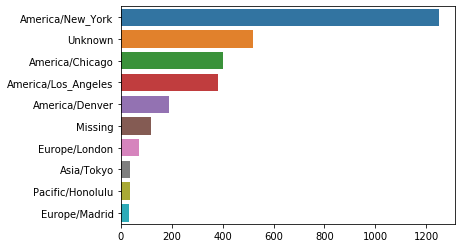

In [19]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [20]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [21]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [23]:
frame['a'][51][:50] # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [24]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [25]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [26]:
cframe = frame[frame.a.notnull()]

In [27]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')
cframe['os'][:5]

C:\Users\IlknurKaraduman\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [28]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [29]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [30]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [31]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [32]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [33]:
# Rearrange the data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


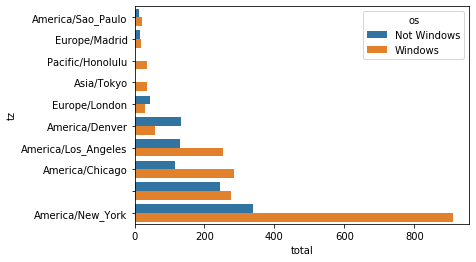

In [34]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [35]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group
results = count_subset.groupby('tz').apply(norm_total)

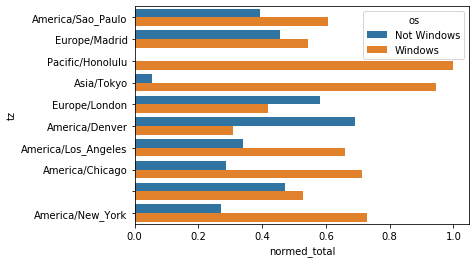

In [36]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [37]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

In [38]:
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64

In [44]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [45]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [46]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [48]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [49]:
 data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [50]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [51]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [52]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [53]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [54]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [55]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [56]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [57]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [58]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [71]:
with open("Desktop/examples/datasets/babynames/yob1880.txt") as f:
    for _ in range(10):
        print(f.readline())

Mary,F,7065

Anna,F,2604

Emma,F,2003

Elizabeth,F,1939

Minnie,F,1746

Margaret,F,1578

Ida,F,1472

Alice,F,1414

Bertha,F,1320

Sarah,F,1288



In [73]:
import pandas as pd
names1880 = pd.read_csv('Desktop/examples/datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [75]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [91]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'Desktop/examples/datasets/babynames//yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [92]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692107,Zymaire,M,5,2010
1692108,Zyonne,M,5,2010
1692109,Zyquarius,M,5,2010
1692110,Zyran,M,5,2010


In [93]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1899824,2053753
2007,1921053,2073784
2008,1889069,2038194
2009,1835062,1981481
2010,1775345,1916476


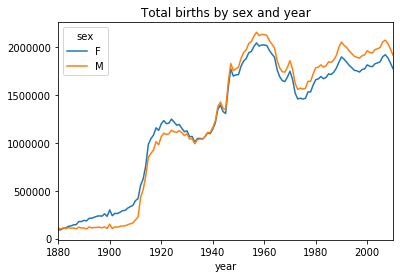

In [94]:
total_births.plot(title='Total births by sex and year')

In [95]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [96]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692107,Zymaire,M,5,2010,0.000003
1692108,Zyonne,M,5,2010,0.000003
1692109,Zyquarius,M,5,2010,0.000003
1692110,Zyran,M,5,2010,0.000003


In [97]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [98]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [99]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [100]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [101]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [102]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [103]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6872 entries, Aaden to Zuri
dtypes: float64(6872)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025208C9F088>,
      dtype=object)

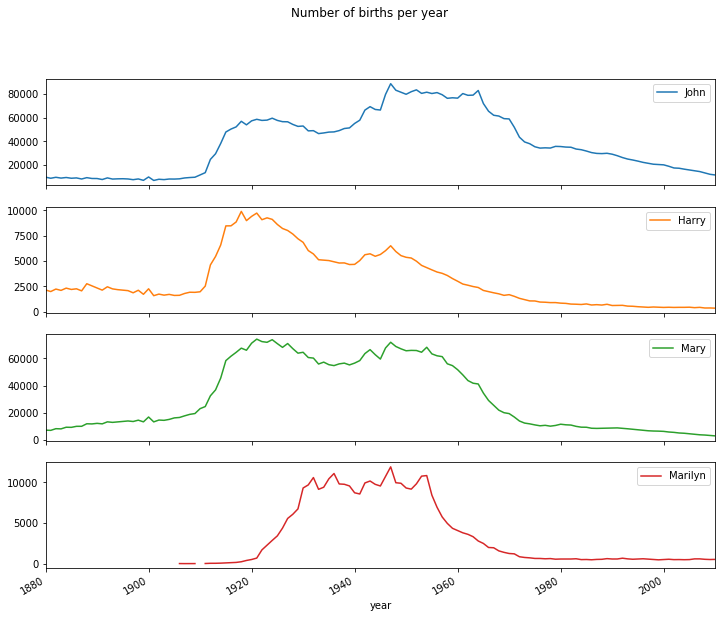

In [104]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")

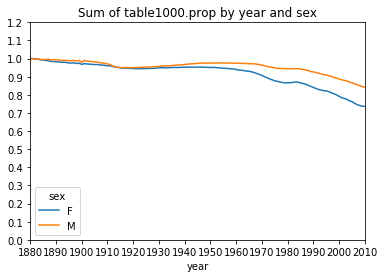

In [106]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [107]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22127,2010,0.011546
260878,Ethan,M,18002,2010,0.009393
260879,Michael,M,17350,2010,0.009053
260880,Jayden,M,17179,2010,0.008964
260881,William,M,17051,2010,0.008897
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [108]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011546
260878    0.020939
260879    0.029992
260880    0.038956
260881    0.047853
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [109]:
prop_cumsum.values.searchsorted(0.5)

116

In [110]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [111]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [112]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


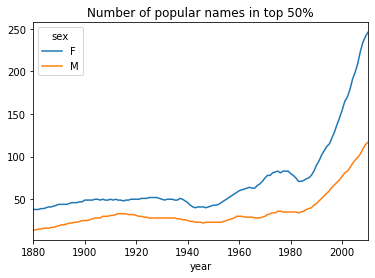

In [113]:
diversity.plot(title="Number of popular names in top 50%")

In [114]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [115]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                 NaN     694.0     455.0    411.0    3912.0   39276.0
c                 5.0      49.0     956.0    482.0   15454.0   23348.0
d              6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e            133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [116]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [117]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341868  0.381258  0.005031  0.002444  0.015063
b                 NaN  0.000343  0.000256  0.002116  0.001835  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007248  0.012183
d            0.017026  0.001845  0.001488  0.113860  0.122935  0.023391
e            0.336947  0.215147  0.178424  0.147596  0.083844  0.067965
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001449
w            0.000020  0.000031  0.001189  0.006323  0.007707  0.016182
x            0.000015  0.000037  0.000729  0.003965  0.001851  0.008597
y            0.110975  0.152553  0.116769  0.077343  0.160982  0.058192
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001828

[26 rows x 6 columns]

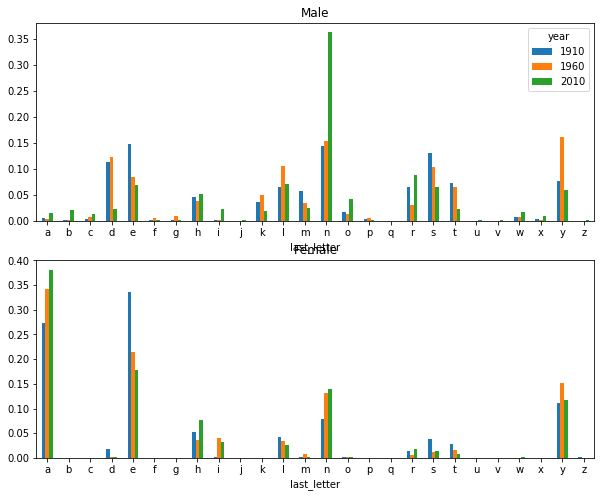

In [118]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [119]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


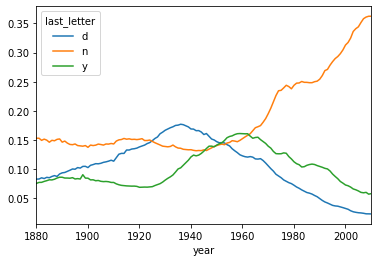

In [120]:
dny_ts.plot()

In [121]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [122]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    370568
Lesly      10072
Name: births, dtype: int64

In [123]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


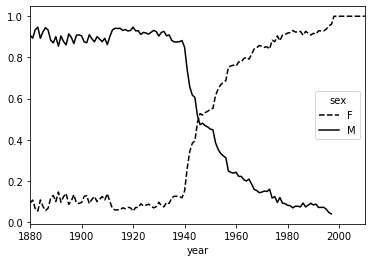

In [124]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [175]:
import json
db = json.load(open('Desktop/examples/datasets/usda_food/usda_food_database.json'))
len(db)

6636

In [176]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [177]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [178]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [179]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [180]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [181]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [182]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [188]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [189]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [190]:
nutrients.duplicated().sum() # number of duplicates

14179

In [191]:
nutrients = nutrients.drop_duplicates()

In [194]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [199]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
value           375176 non-null float64
units           375176 non-null object
nutrient        375176 non-null object
nutgroup        375176 non-null object
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [200]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [197]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

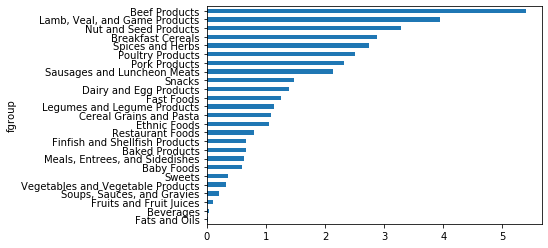

In [201]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
In [181]: result['Zinc, Zn'].sort_values().plot(kind='barh')

In [202]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]
# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [203]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 